In this benchmark, we try to achieve the highest throughput (MB/s) while reading a single ROOT file.

### Local workers reading over FUSE mount

In [ ]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway

nworkers_options = [1,2,3,4,5,6,7,8]
col_num_options = [30,60,90,120,150,180,210,240,270,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_2.1.yaml")
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

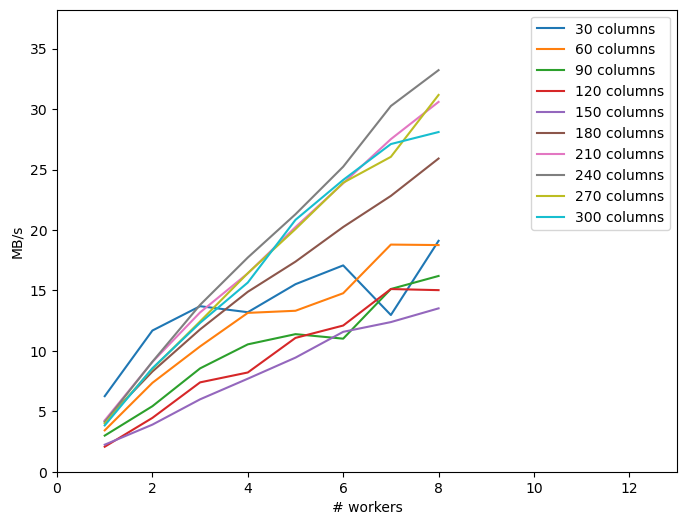

In [2]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

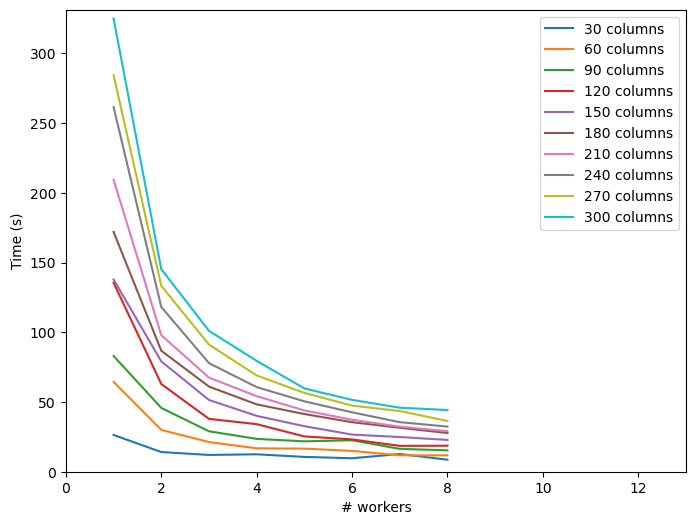

In [4]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### Local workers reading over XCache

In [ ]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway

nworkers_options = [4,8,12,16,20,24]
col_num_options = [60,120,180,240,300]
# col_num_options = [30,60,90,120,150,180,210,240,270,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_2.1.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://cms-xcache.rcac.purdue.edu:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    print(f"{nworkers} workers")
    for col_num in tqdm.tqdm(col_num_options):        
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report_xcache = b.report_df

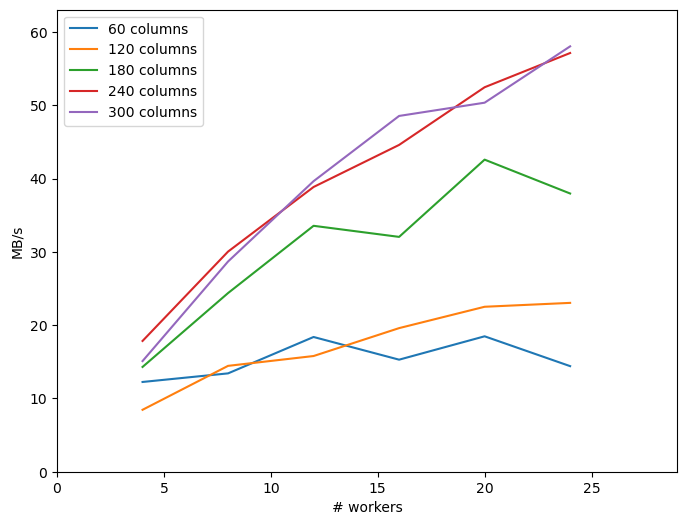

In [3]:
import matplotlib.pyplot as plt

report_xcache["MB/s (compressed)"] = report_xcache.compressed_bytes/report_xcache.process_columns/(1024*1024)

report_by_ncols_xcache = report_xcache.groupby('n_columns_read')
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols_xcache:
    # print(group.n_workers, group["MB/s (compressed)"])
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report_xcache.n_workers.max()+5)
plt.ylim(0, report_xcache['MB/s (compressed)'].max() + 5)
plt.show()

### Dask Gatway workers reading over XCache

In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway

nworkers_options = [100, 140, 180, 220]
col_num_options = [240, 480, 720, 960, 1200]
# col_num_options = [30,60,90,120,150,180,210,240,270,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_2.1.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://cms-xcache.rcac.purdue.edu:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    print(f"{nworkers} workers")
    for col_num in tqdm.tqdm(col_num_options):        
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

100 workers


100%|██████████| 5/5 [05:28<00:00, 65.65s/it]


140 workers


100%|██████████| 5/5 [06:03<00:00, 72.60s/it]


180 workers


100%|██████████| 5/5 [24:43<00:00, 296.75s/it]


220 workers


100%|██████████| 5/5 [48:23<00:00, 580.79s/it]


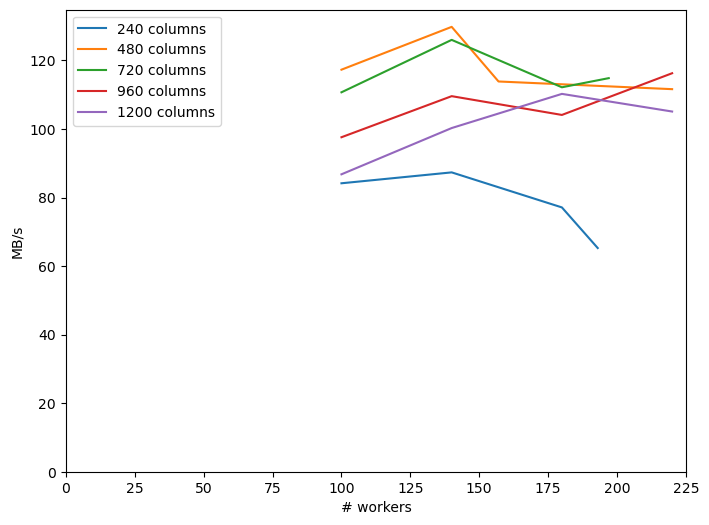

In [3]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    # print(group.n_workers, group["MB/s (compressed)"])
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()